In [2]:
folders_to_test = ['1000', '2000']

In [3]:
from csv import reader
import pandas as pd
import numpy as np
import os, glob, cv2, Classify


folder_pwd = os.getcwd()
os.chdir('..')
os.chdir('../resources/Data - BabyWatcher/Test')
test_csv_path = os.getcwd()

# Change this
result_csv_paths = dict()
for folder_to_test in folders_to_test:
    os.chdir('../'+folder_to_test+'/SVM')
    result_csv_paths[folder_to_test] = os.getcwd()
    os.chdir(test_csv_path)

os.chdir(folder_pwd)

### Load test data

In [4]:
# Get test csv
test_set = pd.read_csv(test_csv_path+'\pre-processed.csv')
test_set

,type,x,y,img,from_file,size
0,head,401,207,20170_2021-02-17_23.26_231242218.png,Batch10.csv - TEST.csv,199
1,head,414,179,20170_2021-02-17_23.26_23155437.png,Batch10.csv - TEST.csv,194
2,spine,360,76,20176_2021-02-18_14.12_1478842.png,Batch10.csv - TEST.csv,165
3,head,353,141,20180_2021-02-14_10.40_103946538.png,Batch10.csv - TEST.csv,200
4,head,429,137,20185_2021-02-19_14.07_14130658.png,Batch10.csv - TEST.csv,133
...,...,...,...,...,...,...
432,head,310,105,21273_2021-04-26_20.02_195224108.png,Batch9.csv - TEST.csv,88
433,hand,421,118,21273_2021-04-26_20.02_195224108.png,Batch9.csv - TEST.csv,36
434,head,256,97,21273_2021-04-26_20.13_20739369.png,Batch9.csv - TEST.csv,109
435,head,329,127,21277_2021-04-27_20.23_201955591.png,Batch9.csv - TEST.csv,92


### Load results

In [5]:
results = []
for folder_to_test in result_csv_paths.keys():
    result_csv_path = result_csv_paths[folder_to_test]
    os.chdir(result_csv_path)
    csvs = glob.glob('*.{}'.format('csv'))
    csvs = [ x for x in csvs if x != 'pre-processed.csv' ]

    r = []
    for file in csvs:
        df = pd.read_csv(file)
        df['set'] = file.split('-')[0]
        df['hog_set'] = '-'.join(file.split('-')[1:]).replace('.csv', '')
        df['folder'] = folder_to_test
        r.append(df)
    os.chdir(folder_pwd)

    results.append(pd.concat(r))
results = pd.concat(results)
results

,x,y,feature,real_size,arm,foot,hand,head,leg,none,spine,prediction_val,count,mean,strength,time,img,set,hog_set,folder
0,305,198,spine,128,0.0215,0.0000,0.0031,0.0000,0.0050,0.8374,0.9462,0.9462,1.0,0.94620,0.955167,10.789446,20170_2021-02-12_23.38_23325424.png,Gaussian Noise,"128-(16, 16)-(4, 4)-compute_hog1",1000
1,114,198,head,192,0.0110,0.0000,0.0000,0.9960,0.0000,0.8318,0.0021,0.9960,2.0,0.99740,0.998267,10.349400,20170_2021-02-13_19.47_19452598.png,Gaussian Noise,"128-(16, 16)-(4, 4)-compute_hog1",1000
2,82,262,spine,128,0.0100,0.0000,0.0251,0.0000,0.0000,0.8289,0.9914,0.9914,2.0,0.97380,0.982533,10.349400,20170_2021-02-13_19.47_19452598.png,Gaussian Noise,"128-(16, 16)-(4, 4)-compute_hog1",1000
3,81,262,head,192,0.0073,0.0000,0.0000,0.9959,0.0042,0.8253,0.0406,0.9959,2.0,0.99640,0.997600,10.230251,20170_2021-02-13_22.06_215733787.png,Gaussian Noise,"128-(16, 16)-(4, 4)-compute_hog1",1000
4,177,262,spine,160,0.1063,0.0000,0.0056,0.0000,0.0000,0.8190,0.9739,0.9739,1.0,0.97390,0.978250,10.230251,20170_2021-02-13_22.06_215733787.png,Gaussian Noise,"128-(16, 16)-(4, 4)-compute_hog1",1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,150,240,head,96,0.0106,0.0000,0.0084,0.9743,0.0059,0.8332,0.0015,0.9743,1.0,0.97430,0.979440,8.076540,21286_2021-05-17_10.09_10516960.png,Test x5 contrast,"128-(16, 16)-(4, 4)-compute_hog1",2000
348,166,555,head,224,0.0350,0.0000,0.0069,0.9910,0.0000,0.8260,0.0112,0.9910,1.0,0.99100,0.992500,15.230333,21300_2021-05-06_21.09_21725711.png,Test x5 contrast,"128-(16, 16)-(4, 4)-compute_hog1",2000
349,184,574,head,160,0.0084,0.0000,0.0029,0.9964,0.0054,0.8304,0.0042,0.9964,2.0,0.99795,0.998770,9.040599,21300_2021-05-06_21.09_21831961.png,Test x5 contrast,"128-(16, 16)-(4, 4)-compute_hog1",2000
350,120,542,spine,192,0.0213,0.0000,0.0000,0.0000,0.0039,0.8342,0.9694,0.9694,1.0,0.96940,0.975520,9.040599,21300_2021-05-06_21.09_21831961.png,Test x5 contrast,"128-(16, 16)-(4, 4)-compute_hog1",2000


### Prepare df

In [6]:
fixed_test = test_set
fixed_test[['x', 'y']] = fixed_test[['y', 'x']]
fixed_test

,type,x,y,img,from_file,size
0,head,207,401,20170_2021-02-17_23.26_231242218.png,Batch10.csv - TEST.csv,199
1,head,179,414,20170_2021-02-17_23.26_23155437.png,Batch10.csv - TEST.csv,194
2,spine,76,360,20176_2021-02-18_14.12_1478842.png,Batch10.csv - TEST.csv,165
3,head,141,353,20180_2021-02-14_10.40_103946538.png,Batch10.csv - TEST.csv,200
4,head,137,429,20185_2021-02-19_14.07_14130658.png,Batch10.csv - TEST.csv,133
...,...,...,...,...,...,...
432,head,105,310,21273_2021-04-26_20.02_195224108.png,Batch9.csv - TEST.csv,88
433,hand,118,421,21273_2021-04-26_20.02_195224108.png,Batch9.csv - TEST.csv,36
434,head,97,256,21273_2021-04-26_20.13_20739369.png,Batch9.csv - TEST.csv,109
435,head,127,329,21277_2021-04-27_20.23_201955591.png,Batch9.csv - TEST.csv,92


In [7]:
prepared = results.rename(columns={'name':'img', 'feature':'type','x':'found_x','y':'found_y', 'to_x':'found_to_x', 'to_y':'found_to_y'})
prepared = prepared.drop(columns=['arm', 'foot', 'hand', 'head', 'leg', 'none', 'spine'], errors='ignore')
prepared

,found_x,found_y,type,real_size,prediction_val,count,mean,strength,time,img,set,hog_set,folder
0,305,198,spine,128,0.9462,1.0,0.94620,0.955167,10.789446,20170_2021-02-12_23.38_23325424.png,Gaussian Noise,"128-(16, 16)-(4, 4)-compute_hog1",1000
1,114,198,head,192,0.9960,2.0,0.99740,0.998267,10.349400,20170_2021-02-13_19.47_19452598.png,Gaussian Noise,"128-(16, 16)-(4, 4)-compute_hog1",1000
2,82,262,spine,128,0.9914,2.0,0.97380,0.982533,10.349400,20170_2021-02-13_19.47_19452598.png,Gaussian Noise,"128-(16, 16)-(4, 4)-compute_hog1",1000
3,81,262,head,192,0.9959,2.0,0.99640,0.997600,10.230251,20170_2021-02-13_22.06_215733787.png,Gaussian Noise,"128-(16, 16)-(4, 4)-compute_hog1",1000
4,177,262,spine,160,0.9739,1.0,0.97390,0.978250,10.230251,20170_2021-02-13_22.06_215733787.png,Gaussian Noise,"128-(16, 16)-(4, 4)-compute_hog1",1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,150,240,head,96,0.9743,1.0,0.97430,0.979440,8.076540,21286_2021-05-17_10.09_10516960.png,Test x5 contrast,"128-(16, 16)-(4, 4)-compute_hog1",2000
348,166,555,head,224,0.9910,1.0,0.99100,0.992500,15.230333,21300_2021-05-06_21.09_21725711.png,Test x5 contrast,"128-(16, 16)-(4, 4)-compute_hog1",2000
349,184,574,head,160,0.9964,2.0,0.99795,0.998770,9.040599,21300_2021-05-06_21.09_21831961.png,Test x5 contrast,"128-(16, 16)-(4, 4)-compute_hog1",2000
350,120,542,spine,192,0.9694,1.0,0.96940,0.975520,9.040599,21300_2021-05-06_21.09_21831961.png,Test x5 contrast,"128-(16, 16)-(4, 4)-compute_hog1",2000


### Get Stats

In [8]:
def iou(row):
    if row[['found_x', 'x']].isna().any():
        row['iou'] = 0
        return row
    boxA = [row['found_x'], row['found_y'], row['found_x']+row['real_size'], row['found_y']+row['real_size']]
    boxB = [row['x'], row['y'], row['x']+row['size'], row['y']+row['size']]
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    iou = interArea / min(boxAArea, boxBArea)
    row['iou'] = iou
    return row

l = []

prepared1 = prepared
for folder in prepared1['folder'].unique():
    for hog_set in prepared1['hog_set'].unique():
        for im_set in prepared['set'].unique():
            p = prepared1[(prepared1['hog_set']==hog_set) & (prepared1['set']==im_set) & (prepared1['folder']==folder)]
            joined = p.merge(fixed_test[fixed_test['img'].isin(prepared1['img'].unique())], on=['img','type'], how='outer')
            joined['hog_set'] = hog_set
            joined['set'] = im_set
            joined['folder'] = folder
            joined = joined.apply(iou, axis=1)
            joined['result'] = ''
            joined.loc[joined['iou']<0.5, 'result'] = 'fp_wrong_area'
            joined.loc[joined['found_x'].isna(),'result'] = 'fn'
            joined.loc[joined['x'].isna(),'result'] = 'fp'
            joined.loc[joined['iou']>=0.5, 'result'] = 'tp'
            l.append(joined)
    
analysed = pd.concat(l).reset_index(drop=True).sort_values('type')

In [9]:
res = analysed.groupby(['folder', 'hog_set', 'set', 'result'])['img'].count().unstack(fill_value=0)
res['precision'] = res['tp']/(res['tp']+res['fp']+res['fp_wrong_area'])
res['recall'] = res['tp']/(res['tp']+res['fn'])
res['accuracy'] = res['tp'] /(res['tp'] + res['fp'] + res['fp_wrong_area'])
res = res.dropna(axis=0)
res

result                                                                fn   fp  \
folder hog_set                                    set                           
1000   128-(16, 16)-(2, 2)-compute_hog            Images              31  281   
       128-(16, 16)-(2, 2)-compute_hog1           Images              37  289   
       128-(16, 16)-(4, 4)-compute_hog1           Gaussian Noise      43  281   
                                                  Images              44  277   
                                                  Test x10 contrast  392   28   
                                                  Test x2 contrast    52  249   
                                                  Test x5 contrast   216  100   
       128-(16, 16)-(4, 4)-compute_hog1-no_filter Images              22  373   
       128-(16, 16)-(4, 4)-compute_hog1_max       Images              29  353   
       128-(8, 8)-(2, 2)-compute_hog              Images              41  252   
       128-(8, 8)-(2, 2)-compute_hog1             Images              40  266   
       96-(16, 16)-(2, 2)-compute_hog             Images              44  257   
       96-(16, 16)-(2, 2)-compute_hog1            Images              50  243   
2000   128-(16, 16)-(4, 4)-compute_hog1           Gaussian Noise      35  281   
                                                  Images              39  265   
                                                  Test x10 contrast  375   40   
                                                  Test x2 contrast    49  230   
                                                  Test x5 contrast   196  111   

result                                                               fp_wrong_area  \
folder hog_set                                    set                                
1000   128-(16, 16)-(2, 2)-compute_hog            Images                       104   
       128-(16, 16)-(2, 2)-compute_hog1           Images                        92   
       128-(16, 16)-(4, 4)-compute_hog1           Gaussian Noise                76   
                                                  Images                        72   
                                                  Test x10 contrast             25   
                                                  Test x2 contrast              97   
                                                  Test x5 contrast              96   
       128-(16, 16)-(4, 4)-compute_hog1-no_filter Images                       109   
       128-(16, 16)-(4, 4)-compute_hog1_max       Images                        76   
       128-(8, 8)-(2, 2)-compute_hog              Images                       124   
       128-(8, 8)-(2, 2)-compute_hog1             Images                       122   
       96-(16, 16)-(2, 2)-compute_hog             Images                        91   
       96-(16, 16)-(2, 2)-compute_hog1            Images                        90   
2000   128-(16, 16)-(4, 4)-compute_hog1           Gaussian Noise                81   
                                                  Images                        75   
                                                  Test x10 contrast             33   
                                                  Test x2 contrast             103   
                                                  Test x5 contrast              97   

result                                                                tp  \
folder hog_set                                    set                      
1000   128-(16, 16)-(2, 2)-compute_hog            Images             302   
       128-(16, 16)-(2, 2)-compute_hog1           Images             308   
       128-(16, 16)-(4, 4)-compute_hog1           Gaussian Noise     318   
                                                  Images             321   
                                                  Test x10 contrast   20   
                                                  Test x2 contrast   288   
                                                  

In [10]:
res_all = analysed.groupby(['folder', 'hog_set', 'set', 'type', 'result'])['img'].count().unstack(fill_value=0)
res_all['precision'] = res_all['tp']/(res_all['tp']+res_all['fp']+res_all['fp_wrong_area'])
res_all['recall'] = res_all['tp']/(res_all['tp']+res_all['fn'])
res_all['accuracy'] = res_all['tp'] /(res_all['tp'] + res_all['fp'] + res_all['fp_wrong_area'])
res_all = res_all.dropna(axis=0)
res_all.loc['1000', :, 'Images', 'head']#['precision']

result                                                         fn  fp  \
folder hog_set                                    set    type           
1000   128-(16, 16)-(2, 2)-compute_hog            Images head   2  26   
       128-(16, 16)-(2, 2)-compute_hog1           Images head   8  26   
       128-(16, 16)-(4, 4)-compute_hog1           Images head  13  22   
       128-(16, 16)-(4, 4)-compute_hog1-no_filter Images head   0  27   
       128-(16, 16)-(4, 4)-compute_hog1_max       Images head   4  26   
       128-(8, 8)-(2, 2)-compute_hog              Images head   5  26   
       128-(8, 8)-(2, 2)-compute_hog1             Images head   9  27   
       96-(16, 16)-(2, 2)-compute_hog             Images head  10  24   
       96-(16, 16)-(2, 2)-compute_hog1            Images head  18  25   

result                                                         fp_wrong_area  \
folder hog_set                                    set    type                  
1000   128-(16, 16)-(2, 2)-compute_hog            Images head             89   
       128-(16, 16)-(2, 2)-compute_hog1           Images head             76   
       128-(16, 16)-(4, 4)-compute_hog1           Images head             59   
       128-(16, 16)-(4, 4)-compute_hog1-no_filter Images head             81   
       128-(16, 16)-(4, 4)-compute_hog1_max       Images head             59   
       128-(8, 8)-(2, 2)-compute_hog              Images head            105   
       128-(8, 8)-(2, 2)-compute_hog1             Images head            100   
       96-(16, 16)-(2, 2)-compute_hog             Images head             73   
       96-(16, 16)-(2, 2)-compute_hog1            Images head             73   

result                                                          tp  precision  \
folder hog_set                                    set    type                   
1000   128-(16, 16)-(2, 2)-compute_hog            Images head  252   0.686649   
       128-(16, 16)-(2, 2)-compute_hog1           Images head  259   0.717452   
       128-(16, 16)-(4, 4)-compute_hog1           Images head  271   0.769886   
       128-(16, 16)-(4, 4)-compute_hog1-no_filter Images head  262   0.708108   
       128-(16, 16)-(4, 4)-compute_hog1_max       Images head  280   0.767123   
       128-(8, 8)-(2, 2)-compute_hog              Images head  233   0.640110   
       128-(8, 8)-(2, 2)-compute_hog1             Images head  234   0.648199   
       96-(16, 16)-(2, 2)-compute_hog             Images head  260   0.728291   
       96-(16, 16)-(2, 2)-compute_hog1            Images head  252   0.720000   

result                                                           recall  \
folder hog_set                                    set    type             
1000   128-(16, 16)-(2, 2)-compute_hog            Images head  0.992126   
       128-(16, 16)-(2, 2)-compute_hog1           Images head  0.970037   
       128-(16, 16)-(4, 4)-compute_hog1           Images head  0.954225   
       128-(16, 16)-(4, 4)-compute_hog1-no_filter Images head  1.000000   
       128-(16, 16)-(4, 4)-compute_hog1_max       Images head  0.985915   
       128-(8, 8)-(2, 2)-compute_hog              Images head  0.978992   
       128-(8, 8)-(2, 2)-compute_hog1             Images head  0.962963   
       96-(16, 16)-(2, 2)-compute_hog             Images head  0.962963   
       96-(16, 16)-(2, 2)-compute_hog1            Images head  0.933333   

result                                                         accuracy  
folder hog_set                                    set    type            
1000   128-(16, 16)-(2, 2)-compute_hog            Images head  0.686649  
       128-(16, 16)-(2, 2)-compute_hog1           Images head  0.717452  
       128-(16, 16)-(4, 4)-compute_hog1           Images head  0.769886  
       128-(16, 16)-(4, 4)-compute_hog1-no_filter Images head  0.708108  
       128-(16, 16)-(4, 4)-compute_hog1_max       Images head  0.767123  
       128-(8, 8)-(2, 2)-compute_hog              Images head  0.640110  
     

# CHECKING

In [14]:
df = analysed.sort_values('iou', ascending=False)[(analysed['result']=='fp_wrong_area')].reset_index(drop=True)
df

<ipython-input-14-13512e382f62>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = analysed.sort_values('iou', ascending=False)[(analysed['result']=='fp_wrong_area')].reset_index(drop=True)


,found_x,found_y,type,real_size,prediction_val,count,mean,strength,time,img,set,hog_set,folder,x,y,from_file,size,iou,result
0,48.0,390.0,head,160.0,0.9433,1.0,0.9433,0.952750,9.796334,20572_2021-03-06_08.29_82114344.png,Images,"128-(16, 16)-(4, 4)-compute_hog1",Zain,153.0,392.0,Batch9.csv - TEST.csv,112.0,0.495575,fp_wrong_area
1,80.0,293.0,head,160.0,0.9206,1.0,0.9206,0.933833,10.643622,20599_2021-03-13_11.38_113753495.png,Images,"128-(16, 16)-(4, 4)-compute_hog1",Zain,162.0,263.0,Batch9.csv - TEST.csv,126.0,0.475107,fp_wrong_area
2,80.0,293.0,head,160.0,0.9623,1.0,0.9623,0.968583,17.339769,20599_2021-03-13_11.38_113753495.png,Images,"128-(16, 16)-(4, 4)-compute_hog1",All,162.0,263.0,Batch9.csv - TEST.csv,126.0,0.475107,fp_wrong_area
3,145.0,134.0,head,224.0,0.9532,1.0,0.9532,0.961000,10.364477,20465_2021-03-16_10.05_1033910.png,Images,"128-(16, 16)-(4, 4)-compute_hog1",Zain,114.0,283.0,Batch9.csv - TEST.csv,118.0,0.472283,fp_wrong_area
4,177.0,230.0,spine,192.0,0.9695,1.0,0.9695,0.974583,10.052882,20536_2021-05-21_21.16_21735834.png,Images,"128-(16, 16)-(4, 4)-compute_hog1",Zain,100.0,252.0,Batch9.csv - TEST.csv,143.0,0.465278,fp_wrong_area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,48.0,294.0,head,64.0,0.9526,1.0,0.9526,0.960500,9.841663,21102_2021-04-11_12.00_11522573.png,Images,"128-(16, 16)-(4, 4)-compute_hog1",Zain,124.0,290.0,Batch11.csv TEST.csv,112.0,0.000000,fp_wrong_area
143,81.0,230.0,head,160.0,0.9382,1.0,0.9382,0.948500,9.911726,20862_2021-04-10_19.30_19295588.png,Images,"128-(16, 16)-(4, 4)-compute_hog1",Zain,111.0,409.0,Batch11.csv TEST.csv,114.0,0.000000,fp_wrong_area
144,305.0,293.0,head,96.0,0.9980,1.0,0.9980,0.998333,10.135602,20862_2021-04-09_12.36_123531930.png,Images,"128-(16, 16)-(4, 4)-compute_hog1",Zain,122.0,357.0,Batch10.csv - TEST.csv,122.0,0.000000,fp_wrong_area
145,176.0,192.0,head,64.0,0.9983,1.0,0.9983,0.998583,10.745806,20318_2021-02-16_18.52_185058927.png,Images,"128-(16, 16)-(4, 4)-compute_hog1",Zain,169.0,259.0,Batch11.csv TEST.csv,145.0,0.000000,fp_wrong_area


<IPython.core.display.Javascript object>


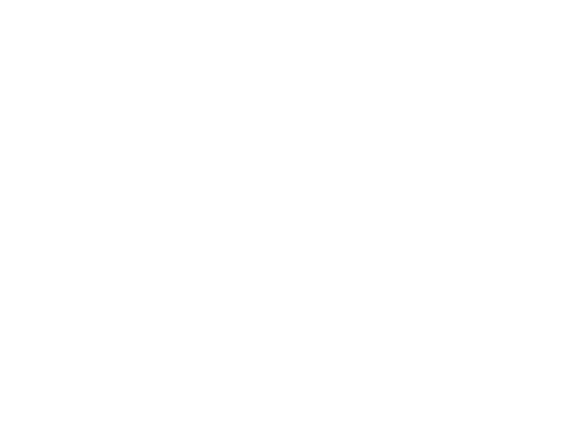

In [13]:
def load_analysed(row):
    #print(row.name, end=' ')
    cwd = os.getcwd()
    os.chdir('../../resources/Data - BabyWatcher/Test/'+row['set'])
    img_path = os.getcwd()
    os.chdir(cwd)
    img = cv2.imread(img_path+'/'+row['img'])
    def draw(box, i, color,  title):
        start = (int(box[0]), int(box[1]))
        end = (int(box[2]), int(box[3]))
        i = cv2.rectangle(i, start, end, color, 2)
        i = cv2.putText(i, title, (int(box[0]), int(box[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9,
                           color,
                           2)
    if row['found_x'] == row['found_x']:
        draw([row['found_y'], row['found_x'], row['found_y']+row['real_size'], row['found_x']+row['real_size']],
            img,
            (0, 255, 0),
            row['type']+' '+str(row['strength']))
    if row['x'] == row['x']:
        draw([row['y'], row['x'], row['y']+row['size'], row['x']+row['size']],
            img,
            (0, 0, 255),
            row['type'])
    return img

def slideshow(img_list, title_list=[]):
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.widgets import Slider, Button, RadioButtons
    %matplotlib notebook
    fig = plt.figure()
    viewer = fig.add_subplot(111)

    fig.show()
    axcolor = 'lightgoldenrodyellow'
    axmax  = fig.add_axes([0.15, 0.1, 0.7, 0.02])
    smax = Slider(axmax, 'idx', 0, len(img_list)-1,valinit=0, valstep=1)

    def arrow_key_image_control(event):
        if event.key=='a':
            update((smax.val-1)%len(img_list))
        if event.key=='d':
            update((smax.val+1)%len(img_list))

    def update(val):
        smax.val = val
        viewer.clear() # Clears the previous image
        viewer.imshow(img_list[int(smax.val)], cmap='gray') # Loads the new image
        s = str(smax.val+1)+'/'+str(len(img_list))
        if len(title_list) > smax.val:
            s+= ' - '+title_list[smax.val]
        viewer.set_title(s)
        plt.pause(0.01) # Delay in seconds
        fig.canvas.draw() # Draws the image tod the screen

    smax.on_changed(update)
    cid = fig.canvas.mpl_connect('key_press_event', arrow_key_image_control)
    viewer.imshow(img_list[0], cmap='gray')

l = df.apply(load_analysed, axis=1)
slideshow(l, df[['type', 'iou', 'img']].astype(str).agg(' - '.join, axis=1).tolist())

### CHECKING SPECIFIC IMAGES

In [14]:
row = df.iloc[13]
from matplotlib import pyplot as plt
from csv import reader
import pandas as pd
import numpy as np
import os, glob, cv2, Classify
import Hog

cwd = os.getcwd()
os.chdir('../../resources/Data - BabyWatcher/Test/'+row['set'])
img_path = os.getcwd()
os.chdir(cwd)
img = cv2.imread(img_path+'/'+row['img'], 0)
plt.imshow(img, cmap='gray')

In [14]:
svms_to_test = folder_to_test+'/SVM/'+row['hog_set']
hog_set = row['hog_set']

os.chdir('../../resources/Data - BabyWatcher/'+svms_to_test)
classifiers = Classify.load_svm(os.getcwd())
os.chdir(cwd)

s = svms_to_test.split('/')[-1]
s = s.split('-')
base_size = int(s[0])
pixels_per_cell = eval(s[1])
cells_per_block = eval(s[2])
method = getattr(Hog,s[3])

def analyse(img):
    analysed_image, result, all_pred = Classify.analyse_image(img, classifiers, crop_thresh=0.2, blur_size=10, bright_strength=1, sharp_strength=1,
                  square_step=True, hog_func=method, base_size=base_size, step=32, sizes=[64, 96, 128, 196],
                  orientations=9,
                  pixels_per_cell=pixels_per_cell,
                  cells_per_block=cells_per_block, pred_threshold=0.9)

    return analysed_image, result, all_pred

analysed_image, pred, all_pred = analyse(img)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\emery\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-cf40e1703544>", line 24, in <module>
    analysed_image, pred, all_pred = analyse(img)
  File "<ipython-input-15-cf40e1703544>", line 16, in analyse
    analysed_image, result, all_pred = Classify.analyse_image(img, classifiers, crop_thresh=0.2, blur_size=10, bright_strength=1, sharp_strength=1,
  File "C:\Users\emery\IdeaProjects\Project3-1\src\HOG\Classify.py", line 127, in analyse_image
    pred = hogs.apply(classification, axis=1)
  File "C:\Users\emery\anaconda3\lib\site-packages\pandas\core\frame.py", line 7768, in apply
    return op.get_result()
  File "C:\Users\emery\anaconda3\lib\site-packages\pandas\core\apply.py", line 185, in get_result
    return self.apply_standard()
  File "C:\Users\emery\anaconda3\lib\site-packages\pandas\core\apply.py", line 276, i

TypeError: object of type 'NoneType' has no len()

In [ ]:
def draw(row, i):
    start = (int(row['y']), int(row['x']))
    end = (int(row['y']+row['size']), int(row['x']+row['size']))
    color = (0, 0, 255)
    i = cv2.rectangle(i, start, end, color, 2)
    i = cv2.putText(i, row['type'], (int(row['y']), int(row['x']) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9,
                       color,
                       2)

img_rect = analysed_image.copy()
fixed_test[fixed_test['img']==row['img']].apply(draw, i=img_rect, axis=1)

plt.imshow(img_rect)

In [ ]:
df = all_pred[all_pred['feature']!='none']
pred_threshold = 0.0
c = ['x', 'y', 'feature']
idx = df.reset_index().groupby(c).agg({'prediction_val': ['mean', 'count']})

idx2 = df.reset_index().groupby(['x', 'y']).agg({'prediction_val': ['mean', 'count']})
idx = idx - (idx2 - idx)
idx = idx[idx['prediction_val', 'count'] > 1]

l = []
temp = df.set_index(c).sort_index()
for i in idx.iterrows():
    t = temp.loc[i[0]]
    t = t.loc[t['real_size'].idxmin()]
    t[i[1].index.levels[1]] = i[1]
    t = t
    l.append(pd.DataFrame(t))

auto_pass = df[df['prediction_val'] > pred_threshold].reset_index(drop=True).set_index(c)
auto_pass['count'] = 1
auto_pass['mean'] = auto_pass['prediction_val']
l.append(auto_pass)
df = pd.concat(l).sort_values(['count', 'real_size'], ascending=[False, True])
df = df[~df.index.duplicated(keep='first')].reset_index()
df['strength'] = df['mean'] + (1 - df['mean']) * ((df['count']-1) / df['real_size'].nunique())
df = df.sort_values('strength', ascending=False)
df

In [ ]:
df['set'] = row['set']
df['img'] = row['img']
joined = df.rename(columns={'feature':'type', 'x':'found_x', 'y':'found_y'}).merge(fixed_test, on=['type', 'img'], how='left')
print(joined.columns.tolist())
l = joined.apply(load_analysed, axis=1)
slideshow(l, joined[['type', 'prediction_val', 'strength']].astype(str).agg(' - '.join, axis=1).tolist())

In [ ]:
slideshow(df['window'].tolist(), df['feature'].tolist())